In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

CONSTELLATIONS=[    "starlink",
                    "oneweb",
                    "iridium"]

FILTER=[
            "starlink",
            "oneweb",
            "iridium",
            "swarm"
]

# From: wget https://celestrak.org/pub/satcat.csv
path = "constellations/{}.csv"

custom_df = pd.read_csv("satcat_custom.csv")
df_dict = {}

def classify_orbit(altitude_km):
    """Classifies orbit based on altitude.
    """
    if(altitude_km < 2000):
        return "LEO" # Low Earth Orbit
    elif(altitude_km < 35786):
        return "MEO" # Medium Earth Orbit
    else:
        return "GSO" # Geosynchronous Orbit

# Loading orbit data from:
#  - https://celestrak.org/NORAD/elements/supplemental
#  - satcat but filtering out satellites with "SPACEBEE" in the name for swarm satellites
    
for c in CONSTELLATIONS:
    temp_df = pd.read_csv(path.format(c))
    temp_df = temp_df.join(custom_df.set_index("OBJECT_ID"), on="OBJECT_ID", rsuffix="_CUSTOM")
    temp_df["LAUNCH_YEAR"] = temp_df.apply(lambda row: int(row["OBJECT_ID"].split("-")[0]), axis=1)
    df_dict[c] = temp_df
# manual
swarm_df = pd.read_csv(path.format("swarm_manual"))
#swarm_df.set_index("OBJECT_ID", inplace=True)
df_dict["swarm"] = swarm_df
df_dict["swarm"] = df_dict["swarm"][df_dict["swarm"]["LAUNCH_YEAR"] >= 2020]

In [73]:
for c in FILTER:
#for c in ["swarm"]:
    print(c)
    print("\t#Satellites: ", len(df_dict[c]))
    print("\tFirst Launch Year", df_dict[c]["LAUNCH_YEAR"].sort_values().iloc[0])   
    print("\tLast Launch Year", df_dict[c]["LAUNCH_YEAR"].sort_values().iloc[-1])
    print("\tAmount of decayed satellites", len(df_dict[c]["DECAY_DATE"].dropna()))
    #print("\t "+ df_dict[c]["DECAY_DATE"].dropna())

starlink
	#Satellites:  3609
	First Launch Year 2019
	Last Launch Year 2023
	Amount of decayed satellites 6
oneweb
	#Satellites:  540
	First Launch Year 2019
	Last Launch Year 2023
	Amount of decayed satellites 0
iridium
	#Satellites:  75
	First Launch Year 2017
	Last Launch Year 2019
	Amount of decayed satellites 0
swarm
	#Satellites:  146
	First Launch Year 2020
	Last Launch Year 2022
	Amount of decayed satellites 1


## Clustering of Orbital Planes

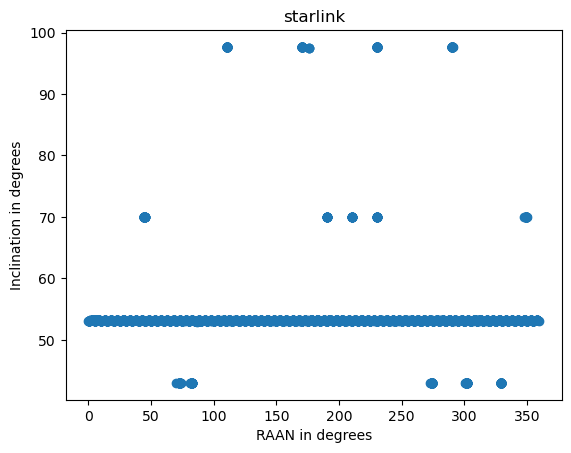

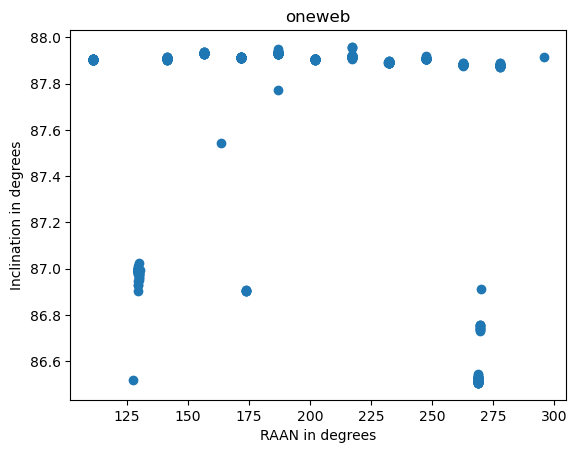

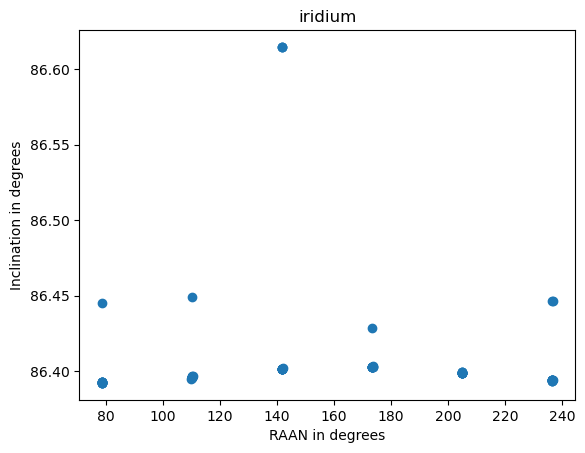

In [76]:
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

## Inclination & Raan

for c in FILTER:
    if(c == "swarm"):
        continue
    plt.scatter(df_dict[c]["RA_OF_ASC_NODE"],
                df_dict[c]["INCLINATION"])
    plt.ylabel("Inclination in degrees")
    plt.xlabel("RAAN in degrees")
    plt.title(c)
    plt.show()

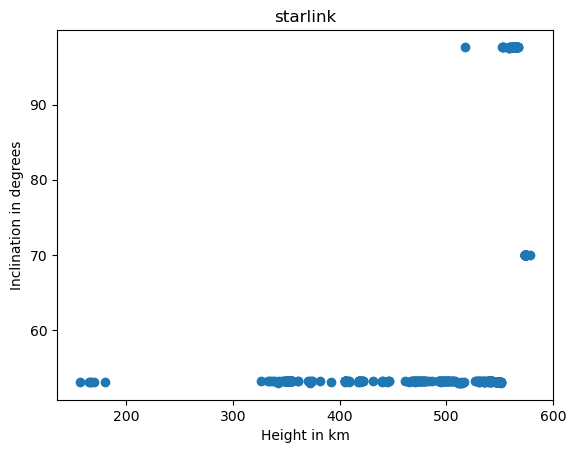

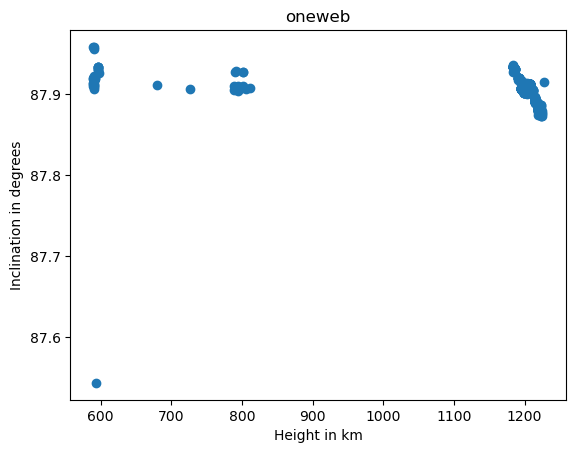

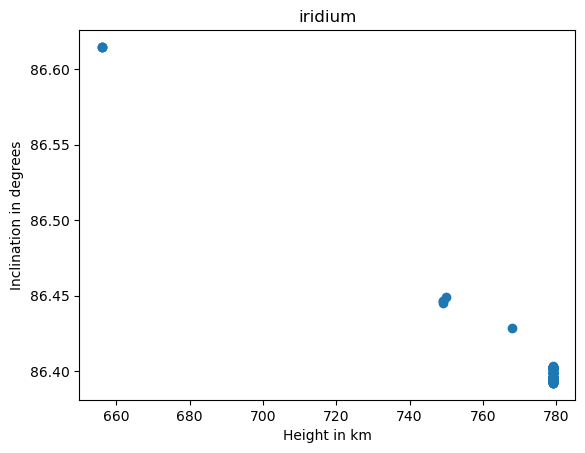

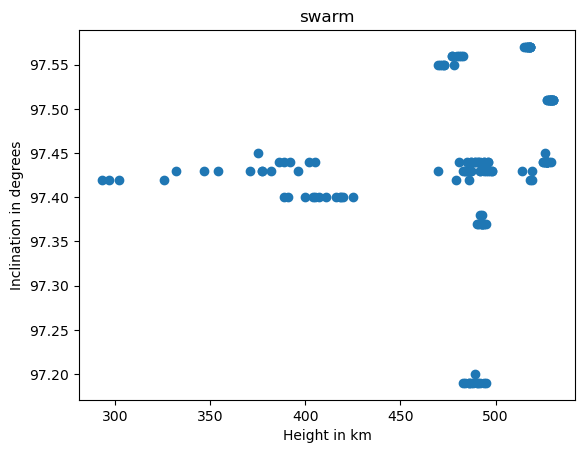

In [75]:
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

## Inclination & Height

for c in FILTER:
    plt.scatter(df_dict[c]["APOGEE"],
                df_dict[c]["INCLINATION"])
    plt.ylabel("Inclination in degrees")
    plt.xlabel("Height in km")
    plt.title(c)
    plt.show()